# 자연어 처리 
- 수집 
- 정제 및 토큰화
- 불용어 / 구두점 제거 
- 단어 사전 => 토큰: 숫자 맵핑 진행 
- 데이터의 수치화 

---
[1] 모듈 로딩 및 데이터 준비

In [150]:
# 모듈 로딩 

from nltk.tokenize import word_tokenize, sent_tokenize, wordpunct_tokenize

# 영어 사용해서 nltk 사용 
# wordpunct_tokenize : 받을 때 부터 구두점 제거해서 사용 


In [151]:
# 데이터 준비 
TEXT_FILE = '../data/corpus_data.txt'

In [152]:
# 파일에서 데이터 추출 => 파일 읽기 default : 'rt'
with open(TEXT_FILE, mode='rt', encoding='utf-8') as f:
    # 읽을 데이터 사이즈 지정한 만큼 읽기
    text_data100 = f.read(100) # 100개 읽기 
    f.seek(0) # 원하는 위치로 이동시킴 
    text_data = f.read()

In [153]:
# 파일에서 데이터 추출 => 파일 읽기 default : 'rt'
with open(TEXT_FILE, mode='rt', encoding='utf-8') as f:
    # 읽을 데이터 사이즈 지정한 만큼 읽기
    text_data_all= f.read() 

In [154]:
len(text_data_all)

42053

In [155]:
len(text_data100), len(text_data)

(100, 42053)

총 42053개이지만 앞에서 100개를 먼저 읽어서 text_data의 길이는 그 이후부터 읽으므로 41953

In [156]:
#파일에서 데이터 추출: rt(파일 읽기 모드의 기본값)
# 라인 단위로 읽기: readline()
with open(TEXT_FILE,mode='rt',encoding='utf-8')as f:
    all_data=[]
    while True:
        #한줄씩 읽기
        text_data=f.readline()
        if not text_data:
            break
        else:
            all_data.append(text_data)

In [157]:
print(f'text data: {len(text_data)}개, {text_data}')
print(f'all data: {len(all_data)}개, {all_data}')

text data: 0개, 
all data: 149개, ['"The Tichborne Claimant" redirects here. For the 1998 film, see The Tichborne Claimant (film).\n', '\n', "The blended image (centre) was said by the Claimant's supporters to prove that Roger Tichborne (left, in 1853) and the Claimant (right, in 1874) were one and the same person.[n 1]\n", 'The Tichborne case was a legal cause célèbre that fascinated Victorian Britain in the 1860s and 1870s. It concerned the claims by a man sometimes referred to as Thomas Castro or as Arthur Orton, but usually termed "the Claimant", to be the missing heir to the Tichborne baronetcy. He failed to convince the courts, was convicted of perjury and served a 14-year prison sentence.\n', '\n', "Roger Tichborne, heir to the family's title and fortunes, was presumed to have died in a shipwreck in 1854 at age 25. His mother clung to a belief that he might have survived, and after hearing rumours that he had made his way to Australia, she advertised extensively in Australian news

In [158]:
#파일에서 데이터 추출: rt(파일 읽기 모드의 기본값)
# 라인 단위로 전체 읽기: readlineㄴ()
with open(TEXT_FILE,mode='rt',encoding='utf-8')as f:
    #한줄씩 전체를 읽이서 리스트에 담아서 반환
    text_data=f.readlines()

In [159]:
print(f'text data: {len(text_data)}개, {text_data}')
print()
for text in text_data: print(text)

text data: 149개, ['"The Tichborne Claimant" redirects here. For the 1998 film, see The Tichborne Claimant (film).\n', '\n', "The blended image (centre) was said by the Claimant's supporters to prove that Roger Tichborne (left, in 1853) and the Claimant (right, in 1874) were one and the same person.[n 1]\n", 'The Tichborne case was a legal cause célèbre that fascinated Victorian Britain in the 1860s and 1870s. It concerned the claims by a man sometimes referred to as Thomas Castro or as Arthur Orton, but usually termed "the Claimant", to be the missing heir to the Tichborne baronetcy. He failed to convince the courts, was convicted of perjury and served a 14-year prison sentence.\n', '\n', "Roger Tichborne, heir to the family's title and fortunes, was presumed to have died in a shipwreck in 1854 at age 25. His mother clung to a belief that he might have survived, and after hearing rumours that he had made his way to Australia, she advertised extensively in Australian newspapers, offerin

---
[2] 데이터 전처리
- 줄바꿈 문자(\n) 처리

In [160]:
all_text=[]
for text in text_data:
    text=text.replace('\n','')
    if len(text): all_text.append(text)

print(f'all text: {len(all_text)}개')

all text: 87개


- 대소문자 통일

In [161]:
all_text=[text.lower() for text in all_text]    #소괄호 안에 넣으면 generater 됨
all_text

['"the tichborne claimant" redirects here. for the 1998 film, see the tichborne claimant (film).',
 "the blended image (centre) was said by the claimant's supporters to prove that roger tichborne (left, in 1853) and the claimant (right, in 1874) were one and the same person.[n 1]",
 'the tichborne case was a legal cause célèbre that fascinated victorian britain in the 1860s and 1870s. it concerned the claims by a man sometimes referred to as thomas castro or as arthur orton, but usually termed "the claimant", to be the missing heir to the tichborne baronetcy. he failed to convince the courts, was convicted of perjury and served a 14-year prison sentence.',
 "roger tichborne, heir to the family's title and fortunes, was presumed to have died in a shipwreck in 1854 at age 25. his mother clung to a belief that he might have survived, and after hearing rumours that he had made his way to australia, she advertised extensively in australian newspapers, offering a reward for information. in 1

In [162]:
all_text=(text.lower() for text in all_text)    #소괄호 안에 넣으면 generator 됨: 양이 많을 때 사용
all_text

<generator object <genexpr> at 0x0000014DF1C3E3C0>

In [163]:
#for _ in all_text: print(_)     #generator니까 반복문 돌려서 꺼내야 함

- 토큰화

In [164]:
all_tokens=[]
for text in all_text:
    all_tokens.append(wordpunct_tokenize(text))

In [165]:
print(f'all tokens: {len(all_tokens)}개')

all tokens: 87개


- 불용어, 구두점 제거

In [166]:
#불용어 추출

from nltk.corpus import stopwords
import string

eng_stop=stopwords.words('english')
pun=list(string.punctuation)

In [167]:
#불용어, 구두점, 길이가 짧은 토큰 삭제

for token_list in all_tokens:
    for token in token_list[::-1]:
        if token.isnumeric():
            token_list.remove(token)
        elif (token in eng_stop) or (token in pun) or (len(token)<=2):
            token_list.remove(token)

In [168]:
for token_list in all_tokens: print(token_list)

['tichborne', 'claimant', 'redirects', 'film', 'see', 'tichborne', 'claimant', 'film']
['blended', 'image', 'centre', 'said', 'claimant', 'supporters', 'prove', 'roger', 'tichborne', 'left', 'claimant', 'right', 'one', 'person']
['tichborne', 'case', 'legal', 'cause', 'célèbre', 'fascinated', 'victorian', 'britain', '1860s', '1870s', 'concerned', 'claims', 'man', 'sometimes', 'referred', 'thomas', 'castro', 'arthur', 'orton', 'usually', 'termed', 'claimant', 'missing', 'heir', 'tichborne', 'baronetcy', 'failed', 'convince', 'courts', 'convicted', 'perjury', 'served', 'year', 'prison', 'sentence']
['roger', 'tichborne', 'heir', 'family', 'title', 'fortunes', 'presumed', 'died', 'shipwreck', 'age', 'mother', 'clung', 'belief', 'might', 'survived', 'hearing', 'rumours', 'made', 'way', 'australia', 'advertised', 'extensively', 'australian', 'newspapers', 'offering', 'reward', 'information', 'wagga', 'wagga', 'butcher', 'known', 'thomas', 'castro', 'came', 'forward', 'claiming', 'roger', 't

- 단어 빈도 수 계산

In [169]:
#토큰을 키로 단어 빈도수 서저장

token_freq={}

#라인 별 토큰 읽어서 빈도 수 체크

for token_list in all_tokens:
    for token in token_list:
        #토큰 키가 존재하지 않으면 추가 후 1로 설정
        if token not in token_freq:
            token_freq[token]=1
        #이미 존재하는 토큰 키면 값 + 1
        else: token_freq[token]+=1

token_freq

{'tichborne': 97,
 'claimant': 115,
 'redirects': 1,
 'film': 4,
 'see': 1,
 'blended': 1,
 'image': 1,
 'centre': 2,
 'said': 5,
 'supporters': 8,
 'prove': 2,
 'roger': 62,
 'left': 6,
 'right': 2,
 'one': 13,
 'person': 2,
 'case': 23,
 'legal': 12,
 'cause': 3,
 'célèbre': 1,
 'fascinated': 1,
 'victorian': 1,
 'britain': 1,
 '1860s': 1,
 '1870s': 1,
 'concerned': 2,
 'claims': 2,
 'man': 4,
 'sometimes': 4,
 'referred': 1,
 'thomas': 8,
 'castro': 15,
 'arthur': 22,
 'orton': 41,
 'usually': 1,
 'termed': 1,
 'missing': 5,
 'heir': 4,
 'baronetcy': 4,
 'failed': 5,
 'convince': 3,
 'courts': 4,
 'convicted': 3,
 'perjury': 5,
 'served': 3,
 'year': 5,
 'prison': 3,
 'sentence': 4,
 'family': 32,
 'title': 3,
 'fortunes': 2,
 'presumed': 3,
 'died': 9,
 'shipwreck': 2,
 'age': 2,
 'mother': 6,
 'clung': 1,
 'belief': 3,
 'might': 6,
 'survived': 1,
 'hearing': 3,
 'rumours': 2,
 'made': 7,
 'way': 1,
 'australia': 13,
 'advertised': 1,
 'extensively': 1,
 'australian': 3,
 'newspap

In [170]:
#빈도별로 몇 개의 단어가 존재하는 지 체크
token_freq.items()

dict_items([('tichborne', 97), ('claimant', 115), ('redirects', 1), ('film', 4), ('see', 1), ('blended', 1), ('image', 1), ('centre', 2), ('said', 5), ('supporters', 8), ('prove', 2), ('roger', 62), ('left', 6), ('right', 2), ('one', 13), ('person', 2), ('case', 23), ('legal', 12), ('cause', 3), ('célèbre', 1), ('fascinated', 1), ('victorian', 1), ('britain', 1), ('1860s', 1), ('1870s', 1), ('concerned', 2), ('claims', 2), ('man', 4), ('sometimes', 4), ('referred', 1), ('thomas', 8), ('castro', 15), ('arthur', 22), ('orton', 41), ('usually', 1), ('termed', 1), ('missing', 5), ('heir', 4), ('baronetcy', 4), ('failed', 5), ('convince', 3), ('courts', 4), ('convicted', 3), ('perjury', 5), ('served', 3), ('year', 5), ('prison', 3), ('sentence', 4), ('family', 32), ('title', 3), ('fortunes', 2), ('presumed', 3), ('died', 9), ('shipwreck', 2), ('age', 2), ('mother', 6), ('clung', 1), ('belief', 3), ('might', 6), ('survived', 1), ('hearing', 3), ('rumours', 2), ('made', 7), ('way', 1), ('aust

In [171]:
#키-값 을 바꾸기(값을 기준으로 확인하기 위해서) but 값이 겹치는 경우가 많음
#{v:K for k,v in t token_freq.items()} <- 값이 유니크할 경우에만 사용 가능

# 1: [redirects, see, blended, ...]  
freqDict={}
for k,v in token_freq.items():
    if v not in freqDict:
        freqDict[v]=[k]
    else:
        freqDict[v].append(k)

print(freqDict)

{97: ['tichborne'], 115: ['claimant'], 1: ['redirects', 'see', 'blended', 'image', 'célèbre', 'fascinated', 'victorian', 'britain', '1860s', '1870s', 'referred', 'usually', 'termed', 'clung', 'survived', 'way', 'advertised', 'extensively', 'forward', 'claiming', 'manners', 'unrefined', 'gathered', 'instantly', 'dismissive', 'protracted', 'emerged', 'suggesting', 'charged', 'gain', 'passing', 'condemned', 'instigated', 'reform', 'championed', 'elected', 'independent', 'effective', 'parliamentarian', 'decline', 'dealings', 'recant', 'poverty', 'view', 'analysts', 'believe', 'element', 'conceivably', 'norman', 'conquest', 'reformation', '16th', 'century', 'number', 'hanged', 'drawn', 'quartered', 'complicity', 'babington', 'plot', 'assassinate', 'elizabeth', 'loyal', 'benjamin', 'services', 'king', 'tree', 'simplified', 'extinct', '14th', 'seventh', 'travelling', 'verdun', 'peace', 'amiens', 'broke', 'reigniting', 'napoleonic', 'wars', 'enemy', 'citizen', 'detained', 'held', 'shared', 'fo

In [172]:
total=len(token_freq)

In [173]:
#빈도수 별 단어 개수 저장 (1번 나온 단어는 몇개고 2번 나온 단어는 몇갠지)

freqDict={}
for k,v in token_freq.items():
    if v not in freqDict:
        freqDict[v]=1
    else:
        freqDict[v]+=1

print(freqDict)

{97: 1, 115: 1, 1: 1054, 4: 80, 2: 283, 5: 43, 8: 12, 62: 1, 6: 16, 13: 6, 23: 2, 12: 2, 3: 113, 15: 1, 22: 2, 41: 1, 32: 1, 9: 4, 7: 19, 11: 8, 14: 3, 10: 5, 19: 1, 18: 3, 16: 1}


In [174]:
freqDict={}
for k,v in token_freq.items():
    if v not in freqDict:
        freqDict[v]=[1,[k]]
    else:
        freqDict[v][1].append(k)
        freqDict[v][0]+=1

print(freqDict)

{97: [1, ['tichborne']], 115: [1, ['claimant']], 1: [1054, ['redirects', 'see', 'blended', 'image', 'célèbre', 'fascinated', 'victorian', 'britain', '1860s', '1870s', 'referred', 'usually', 'termed', 'clung', 'survived', 'way', 'advertised', 'extensively', 'forward', 'claiming', 'manners', 'unrefined', 'gathered', 'instantly', 'dismissive', 'protracted', 'emerged', 'suggesting', 'charged', 'gain', 'passing', 'condemned', 'instigated', 'reform', 'championed', 'elected', 'independent', 'effective', 'parliamentarian', 'decline', 'dealings', 'recant', 'poverty', 'view', 'analysts', 'believe', 'element', 'conceivably', 'norman', 'conquest', 'reformation', '16th', 'century', 'number', 'hanged', 'drawn', 'quartered', 'complicity', 'babington', 'plot', 'assassinate', 'elizabeth', 'loyal', 'benjamin', 'services', 'king', 'tree', 'simplified', 'extinct', '14th', 'seventh', 'travelling', 'verdun', 'peace', 'amiens', 'broke', 'reigniting', 'napoleonic', 'wars', 'enemy', 'citizen', 'detained', 'hel

In [175]:
#키를 기준으로 정렬
sorted(freqDict.items(),reverse=True)

[(115, [1, ['claimant']]),
 (97, [1, ['tichborne']]),
 (62, [1, ['roger']]),
 (41, [1, ['orton']]),
 (32, [1, ['family']]),
 (23, [2, ['case', 'sir']]),
 (22, [2, ['arthur', 'kenealy']]),
 (19, [1, ['lady']]),
 (18, [3, ['son', 'court', 'years']]),
 (16, [1, ['trial']]),
 (15, [1, ['castro']]),
 (14, [3, ['wagga', 'although', 'name']]),
 (13, [6, ['one', 'australia', 'england', 'may', 'doughty', 'would']]),
 (12, [2, ['legal', 'evidence']]),
 (11,
  [8,
   ['information',
    'london',
    'edward',
    'james',
    'henry',
    'former',
    '".[',
    'witnesses']]),
 (10, [5, ['support', 'accepted', 'civil', 'bogle', 'cockburn']]),
 (9, [4, ['died', 'john', 'ship', 'including']]),
 (8,
  [12,
   ['supporters',
    'thomas',
    'details',
    'wapping',
    'identity',
    'became',
    'later',
    'two',
    'first',
    'could',
    'ballantine',
    'hawkins']]),
 (7,
  [19,
   ['made',
    'butcher',
    'park',
    'remained',
    'daughter',
    'much',
    'katherine',
    '

---
[3] 단어 집합(사전) 생성
- '단어: 숫자' 맵핑
- 나의 데이터셋을 숫자로 변환하기 위한 인코딩 테이블 만드는 과정
- 문장을 수치화 진행 시 길이를 동일하게 맞추는 작업(패딩) 필요 w. 패딩에 사용되는 토큰 
    - 'PAD': 0 형태
- 테스트/검증에 입력되는 텍스트 중 단어사전/집합에 존재하지 않는 단어 등장 시 존재하지 않는 토큰 사용
    - 'OOV' 또는 'UNK' : 1 형태


In [176]:
#빈도가 높게 나오는 순서대로 단어 정렬: 값을 기준으로 내림차순 정렬
sorted_token=sorted(token_freq.items(),key=lambda x:x[1],reverse=True)

In [177]:
#단어 사전 생성 및 초기화: PAD, OOV/UNK

vocab={'PAD':0, 'OOV': 1}

In [178]:
for tk in sorted_token:
    print(tk[0])
    break

claimant


In [179]:
for idx,tk in enumerate(sorted_token,2):
    vocab[tk[0]]=idx

print(vocab)

{'PAD': 0, 'OOV': 1, 'claimant': 2, 'tichborne': 3, 'roger': 4, 'orton': 5, 'family': 6, 'case': 7, 'sir': 8, 'arthur': 9, 'kenealy': 10, 'lady': 11, 'son': 12, 'court': 13, 'years': 14, 'trial': 15, 'castro': 16, 'wagga': 17, 'although': 18, 'name': 19, 'one': 20, 'australia': 21, 'england': 22, 'may': 23, 'doughty': 24, 'would': 25, 'legal': 26, 'evidence': 27, 'information': 28, 'london': 29, 'edward': 30, 'james': 31, 'henry': 32, 'former': 33, '".[': 34, 'witnesses': 35, 'support': 36, 'accepted': 37, 'civil': 38, 'bogle': 39, 'cockburn': 40, 'died': 41, 'john': 42, 'ship': 43, 'including': 44, 'supporters': 45, 'thomas': 46, 'details': 47, 'wapping': 48, 'identity': 49, 'became': 50, 'later': 51, 'two': 52, 'first': 53, 'could': 54, 'ballantine': 55, 'hawkins': 56, 'made': 57, 'butcher': 58, 'park': 59, 'remained': 60, 'daughter': 61, 'much': 62, 'katherine': 63, 'june': 64, 'april': 65, 'bella': 66, 'lost': 67, 'sydney': 68, 'william': 69, 'examination': 70, 'found': 71, 'many':

In [180]:
#텍스트 문장 -> 수치화

encodingData=[]
for token_list in all_tokens:

    #1개 문장 인코딩
    sent=[]
    print(f'문장: {token_list}')
    for token in token_list:
        sent.append(vocab[token])

    #인코딩된 문장 저장
    encodingData.append(sent)
    print(f'인코딩 결과: {sent}')
    

문장: ['tichborne', 'claimant', 'redirects', 'film', 'see', 'tichborne', 'claimant', 'film']
인코딩 결과: [3, 2, 611, 135, 612, 3, 2, 135]
문장: ['blended', 'image', 'centre', 'said', 'claimant', 'supporters', 'prove', 'roger', 'tichborne', 'left', 'claimant', 'right', 'one', 'person']
인코딩 결과: [613, 614, 328, 92, 2, 45, 329, 4, 3, 76, 2, 330, 20, 331]
문장: ['tichborne', 'case', 'legal', 'cause', 'célèbre', 'fascinated', 'victorian', 'britain', '1860s', '1870s', 'concerned', 'claims', 'man', 'sometimes', 'referred', 'thomas', 'castro', 'arthur', 'orton', 'usually', 'termed', 'claimant', 'missing', 'heir', 'tichborne', 'baronetcy', 'failed', 'convince', 'courts', 'convicted', 'perjury', 'served', 'year', 'prison', 'sentence']
인코딩 결과: [3, 7, 26, 215, 615, 616, 617, 618, 619, 620, 332, 333, 136, 137, 621, 46, 16, 9, 5, 622, 623, 2, 93, 138, 3, 139, 94, 216, 140, 217, 95, 218, 96, 219, 141]
문장: ['roger', 'tichborne', 'heir', 'family', 'title', 'fortunes', 'presumed', 'died', 'shipwreck', 'age', 'moth

---
[4] 패딩(padding)
- 길이가 다른 문장들의 길이 일치시키기
    1. 가장 긴 문장을 기준으로 나머지 문장에 길이 맞춰서 PAD 토큰(0) 추가
    2. 개발자가 지정한 길이를 기준으로 일치시킬 경우
        - 지정한 길이보다 긴 문장은 자르고(자를 때는 어디를 자를지 선택해야 함)
        - 지정한 길이보다 짧은 문장은 PAD 토큰(0)으로 채우기

In [181]:
#각 문장 길이 체크
datalen=[len(sent) for sent in encodingData]
print(datalen)

[8, 14, 35, 58, 59, 56, 3, 3, 42, 10, 85, 48, 61, 67, 2, 8, 95, 7, 67, 78, 2, 1, 7, 56, 59, 62, 112, 2, 6, 65, 62, 2, 2, 8, 112, 134, 117, 2, 3, 6, 76, 2, 36, 67, 62, 4, 5, 50, 3, 7, 99, 54, 101, 2, 92, 2, 9, 75, 68, 43, 4, 2, 14, 59, 108, 1, 6, 78, 89, 28, 69, 3, 82, 64, 1, 2, 7, 143, 4, 5, 50, 81, 1, 61, 62, 93, 78]


In [182]:
import matplotlib.pyplot as plt

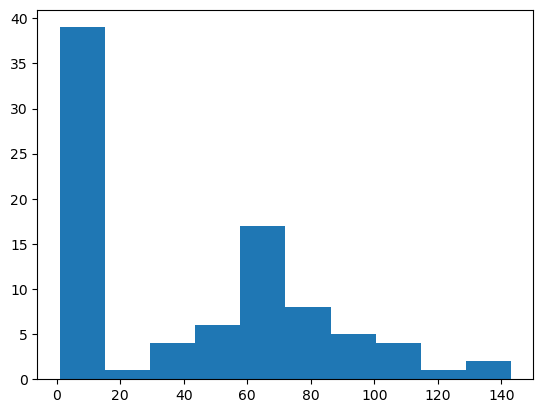

In [183]:
plt.hist(datalen)
plt.show()

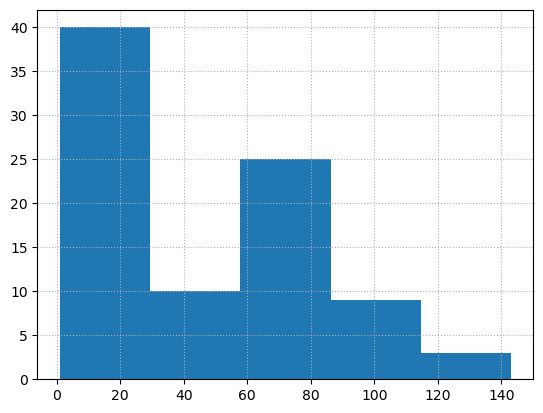

In [184]:
plt.hist(datalen,bins=5)
plt.grid(linestyle=':')
plt.show()

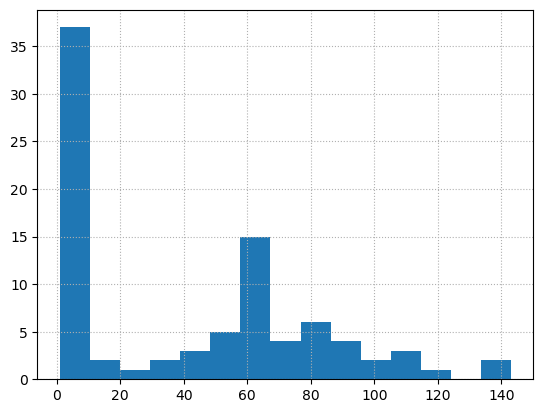

In [185]:
plt.hist(datalen,bins=15)
plt.grid(linestyle=':')
plt.show()

In [186]:
# 1. 가장 긴 문장을 기준으로 채우기

#기준 길이
max_length=max(datalen)

max_length

143

In [191]:
for idx,sent in enumerate(encodingData):
    cur_length=len(sent)
    if cur_length<max_length:
        encodingData[idx]=sent+([0]*(max_length-cur_length))

In [193]:
for _ in encodingData[:3]:
    print(len(_),_)

143 [3, 2, 611, 135, 612, 3, 2, 135, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
143 [613, 614, 328, 92, 2, 45, 329, 4, 3, 76, 2, 330, 20, 331, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
143 [3, 7, 26, 215, 615, 616, 617, 618, 619, 620, 332, 333, 136, 137, 621, 46, 16, 9, 5, 622, 623, 2, 93, 13

In [194]:
# 2. 지정한 길이를 기준으로 채우기

#기준 길이
max_length=100

In [ ]:
for idx,sent in enumerate(encodingData):
    cur_length=len(sent)
    if cur_length<max_length:
        encodingData[idx]=sent+([0]*(max_length-cur_length))
    else:
        #앞을 잘라낼 때
        encodingData[idx]=sent[(cur_length-max_length):]    #뒤를 잘라낼 때는 encodingData[idx]=sent[:max_length]